In [3]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sys
sys.path.append("../src")

from preprocess import get_feature_types

df = pd.read_csv("../data/german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.info() #kiem tra thong tin tong quan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
df.isna().sum() #kiem tra missing value

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.dtypes 

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [5]:
df['Risk'].value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

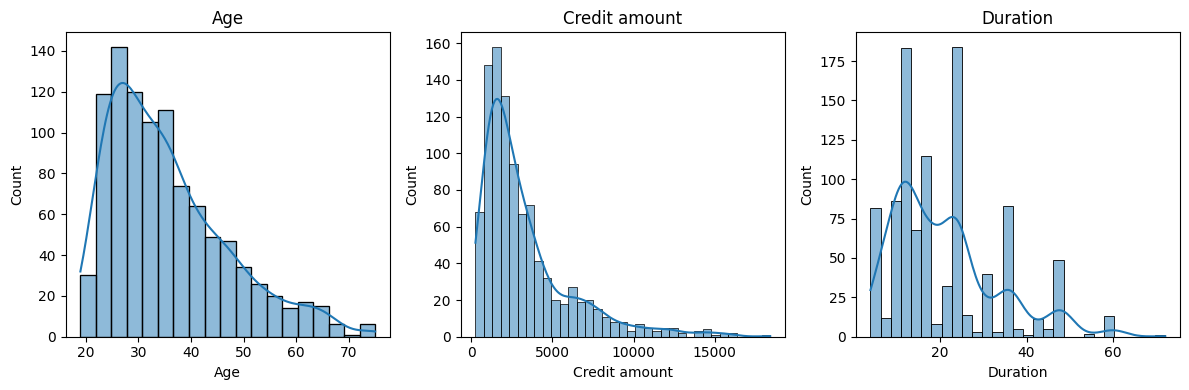

In [6]:
#histogram numeric
numeric_cols, categorical_cols = get_feature_types(df)

plt.figure(figsize=(12,4))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(1,len(numeric_cols),i)
    sns.histplot(df[col].dropna(),kde=True)
    plt.title(col)
plt.tight_layout()

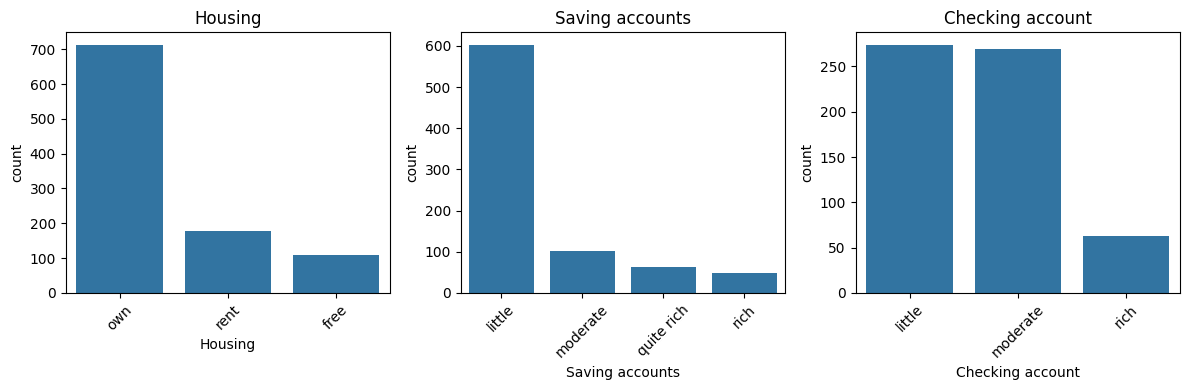

In [ ]:
#countplots cho categorical chinh (housing, saving accounts, checking account)
cats=["Housing", "Saving accounts", "Checking account"]
plt.figure(figsize=(12,4))
for i, c in enumerate(cats,1):
    plt.subplot(1,len(cats),i)
    sns.countplot(data=df,x=c,order=df[c].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(c)
plt.tight_layout()

#thay phan bo categories, category nho hay nhieu NA

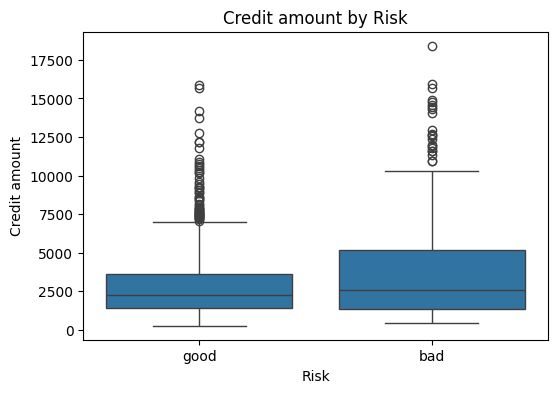

In [9]:
#boxplot credit amount vs risk

plt.figure(figsize=(6,4))
sns.boxplot(data=df,x="Risk", y="Credit amount")
plt.title("Credit amount by Risk")
plt.show()

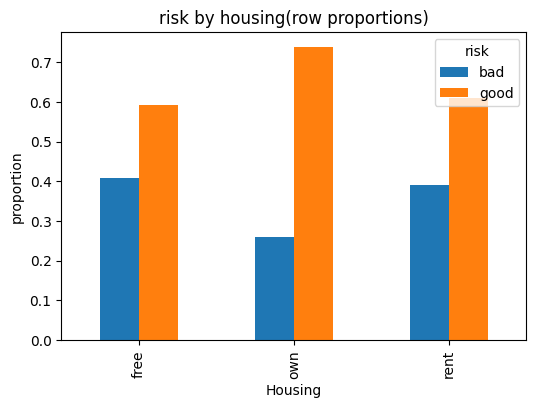

In [ ]:
#bar chart: housing vs risk
ct=pd.crosstab(df["Housing"], df["Risk"], normalize="index")
ct.plot(kind="bar",stacked=False,figsize=(6,4))
plt.ylabel("proportion")
plt.title("risk by housing(row proportions)")
plt.legend(title="risk")
plt.show()
#muc dich: biet housing lien quan the nao den default

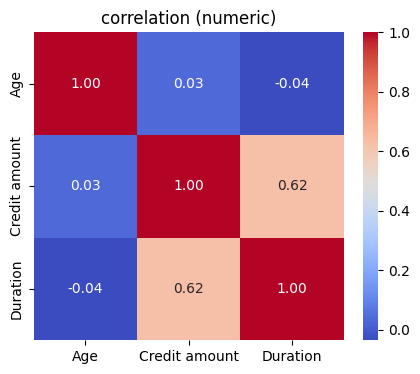

In [ ]:
#correlation heatmap numeric
plt.figure(figsize=(5,4))
sns.heatmap(df[numeric_cols].corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("correlation (numeric)")
plt.show()
#phat hien bien qua tuong quan

In [ ]:
#pivot table: default probability theo Job
pivot =df.pivot_table(index="Job", columns="Risk",aggfunc="size", fill_value=0)
pivot["prob_bad"]=pivot.get("bad",0)/pivot.sum(axis=1)
pivot=pivot.sort_values("prob_bad",ascending=False)
pivot[["prob_bad"]].head(10)

#hieu nhom Job co rui ro cao 

Risk,prob_bad
Job,
3,0.344595
0,0.318182
2,0.295238
1,0.280000


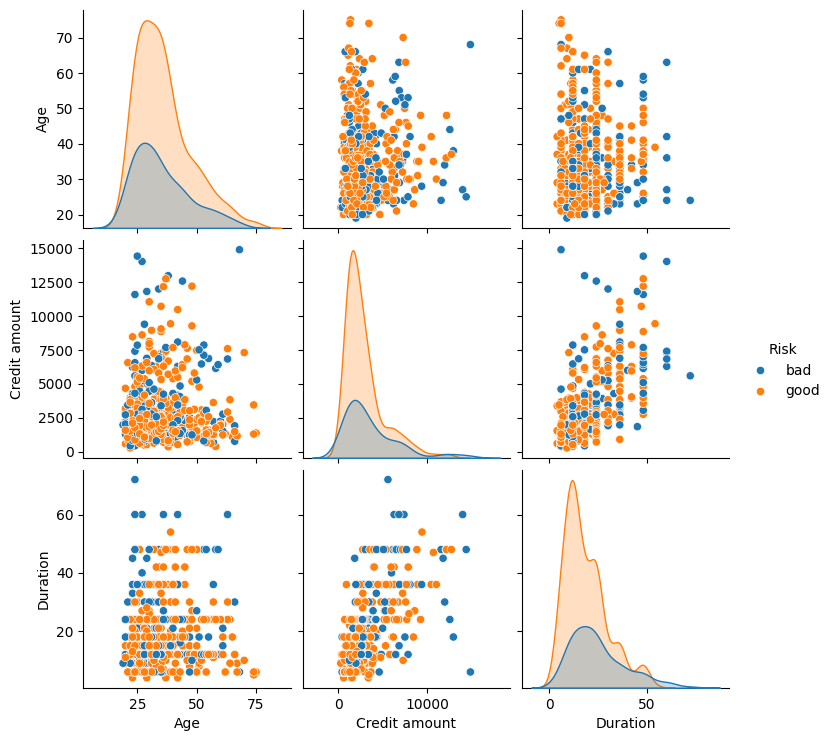

In [ ]:
#quick feature-target relationships cho nhieu bien 
sample=df.sample(500,random_state=42) if len(df)>500 else df
sns.pairplot(sample,vars=numeric_cols,hue="Risk", diag_kind="kde")
plt.show()
#quan sat tuong tac nhieu chieu